# SciPy

## Import library

In [ ]:
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

## Special Functions

For details, see the list of func- tions in the reference documentation at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. To demonstrate the typical usage of special functions, we will look in more detail at the Bessel functions:


In [ ]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [ ]:
n = 0 # order 
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind 
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


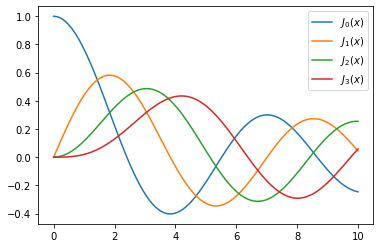

In [ ]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots() 
for n in range(4):
  ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n) #'{} is '.format(n)
ax.legend();

Bessel functions, first defined by the mathematician Daniel Bernoulli and then generalized by Friedrich Bessel, are canonical solutions $y(x)$ of Bessel's differential equation
$x^2\frac{d^2y}{dx^2} + x\frac{dy}{dx} + (x^2-\alpha^2)y = 0$

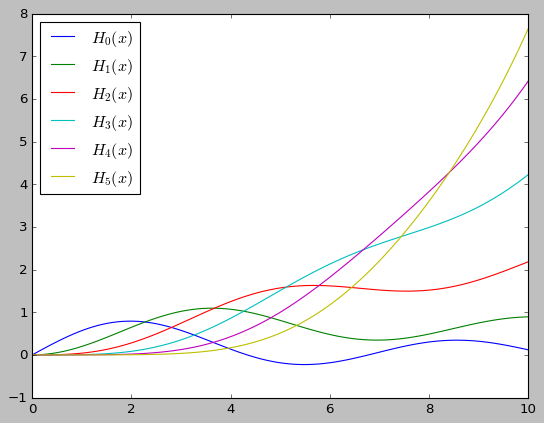

In [ ]:
import scipy.special as sp_functions

def struve_function_implem(): 
    plt.style.use('classic')
    
    x = np.linspace(0, 10, 100)
    fig, ax = plt.subplots() 
    for n in range(6): 
        ax.plot(x, sp_functions.struve(n, x), label=r"$H_%d(x)$" % n) #implementing Struve function of n-th kind in range(6)
    ax.legend(loc = 'upper left');
    
struve_function_implem()

In mathematics, the Struve functions $H_α(x)$, are solutions $y(x)$ of the non-homogeneous Bessel's differential equation:
$x^2\frac{d^2y}{dx^2} + x\frac{dy}{dx} + (x^2-\alpha^2)y = \frac{4({\frac{z}{2}})^{\gamma+1}}{\sqrt{\pi}\cdot\Gamma(\gamma+\frac{1}{2})}$(Wikipedia)(https://en.wikipedia.org/wiki/Struve_function)

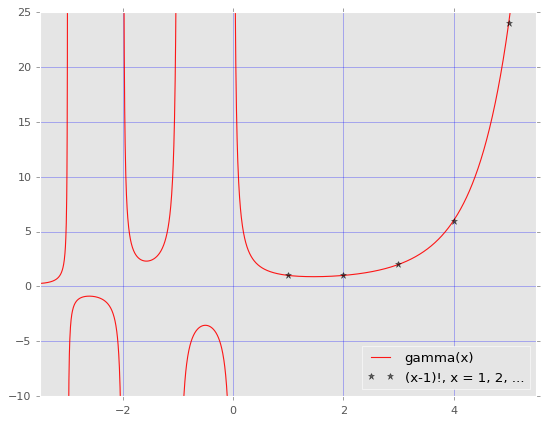

In [ ]:
def gamma_function_implem():
    
    plt.style.use('ggplot')
    
    #defining our variables
    x = np.linspace(-3.5, 5.5, 2251)
    y = sp_functions.gamma(x)
    
    #plotting
    plt.plot(x, y, 'r', alpha=0.9, label='gamma(x)')
    
    #giving a range to the values of factorial
    k = np.arange(1, 7)
    
    #plotting factorial
    plt.plot(k, sp_functions.factorial(k-1), 'k*', alpha=0.6, label='(x-1)!, x = 1, 2, ...')
    
    plt.xlim(-3.5, 5.5)
    plt.ylim(-10, 25)
    plt.grid(alpha = 0.5, color = 'b')
    plt.legend(loc='lower right');
    
gamma_function_implem()

In mathematics, the gamma function (represented by $\Gamma$) the capital letter gamma from the Greek alphabet) is one commonly used extension of the factorial function to complex numbers. The gamma function is defined for all complex numbers except the non-positive integers. For any positive integer n:

$\Gamma(n)=(n-1)!$

Derived by Daniel Bernoulli, for complex numbers with a positive real part the gamma function is defined via a convergent improper integral:

$\Gamma(z) = \int{x^{z-1}\exp^{-x}dx}$, for $R(z)>0$

https://en.wikipedia.org/wiki/Gamma_function

## Integration

### Numeric Integration

In [ ]:
from scipy.integrate import quad, dblquad, tplquad

#### Problem 1

Integral of $\int_{2}^{5} x^3 dx = $

In [ ]:
# defining a function
def some_function(x):
    return x**3

# setting values
a_value = 2
b_value = 5

# returns value of integral and absolute error
val, abserr = quad(some_function, a_value, b_value)

print("integral value =", val, ", absolute error =", abserr)

integral value = 152.25000000000006 , absolute error = 1.6903145549918014e-12


#### Solution of Bessel function

In [ ]:
def integrand(x, n): 
    """ Bessel function of first kind and order n. Function takes arguments by default""" 
    return sp_functions.jn(n, x)

x_lower = 0 # the lower limit of x 
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))
print(val, abserr)

0.7366751370811073 9.389126882496403e-13


You can use lambda function instead of explicitly defining a function for integrand

In [ ]:
val, abserr = quad(lambda x: np.exp(-x**2), -np.Inf, np.Inf)

# Numeric answer
print(val, abserr)

# Analytical answer
print(np.sqrt(np.pi))

1.7724538509055159 1.4202636780944923e-08
1.7724538509055159


#### For higher-dimensional integration

In [ ]:
def integrand(x, y): 
    return np.exp(-x**2-y**2)
x_lower = 0 
x_upper = 10 
y_lower = 0 
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)
print(val)

0.7853981633974476


### Ordinary Differential Equations

In [ ]:
from scipy.integrate import odeint

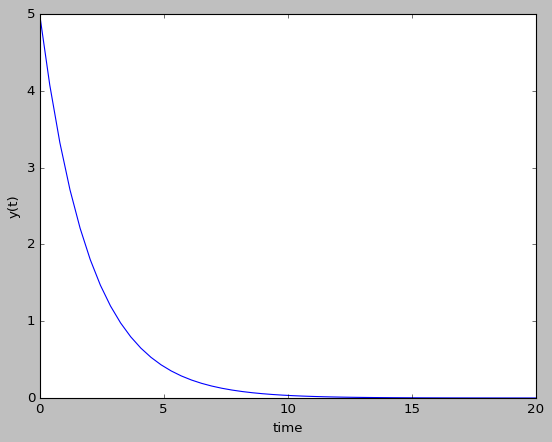

In [ ]:
plt.style.use('classic')

def simple_model(y, t):
    k = 0.5
    dydt = -k * y
    return dydt

y_0 = 5
t = np.linspace(0,20,50)

y = odeint(simple_model, y_0, t)

plt.plot(t,y)

plt.xlabel('time')
plt.ylabel('y(t)');

#### Problem 2

Try yourself:

$\frac{dx}{dt}=5x-3$

with $y(0)=1$ and $0<t<6$

Solving ode changing the coeff k

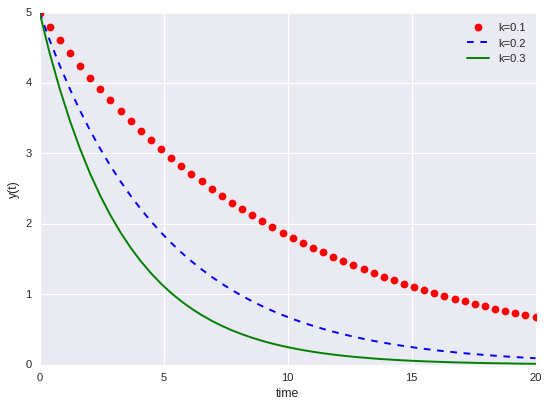

In [ ]:
plt.style.use('seaborn')

def another_simple_model(y, t, k):
    dydt = -k * y
    return dydt

y_0 = 5
t = np.linspace(0,20,50)

k = 0.1
y1 = odeint(another_simple_model, y_0, t, args = (k,))
k = 0.2
y2 = odeint(another_simple_model, y_0, t, args = (k,))
k = 0.3
y3 = odeint(another_simple_model, y_0, t, args = (k,))

plt.plot(t,y1,'ro')
plt.plot(t,y2, 'b--')
plt.plot(t,y3, 'g-')
plt.legend(['k=0.1','k=0.2','k=0.3'], loc = 'best')
plt.xlabel('time')
plt.ylabel('y(t)');

#### Problem 3

$\dfrac{dy(t)}{5dt}=y(t)-2$

initial condition:
y0 = 1,
boundary condition:
0<t<5

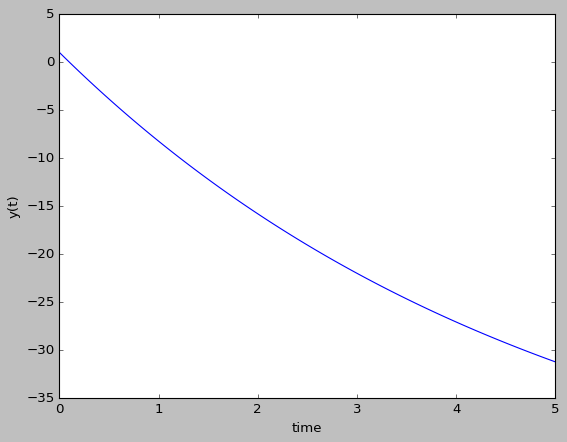

In [ ]:
plt.style.use('classic')

def simple_model(y, t):
    dydt = -0.2* y-10
    return dydt

y_0 = 1
t = np.linspace(0,5,100)

y = odeint(simple_model, y_0, t)

plt.plot(t,y)

plt.xlabel('time')
plt.ylabel('y(t)');

This function helps for solving multiple differential equations also

#### Problem 4 and solution for second-order differential equations

Suppose we have a second-order ODE such as a damped simple harmonic motion equation:

$y''+2y'+2y=cos(2x),   y(0)=0, y'(0)=0$

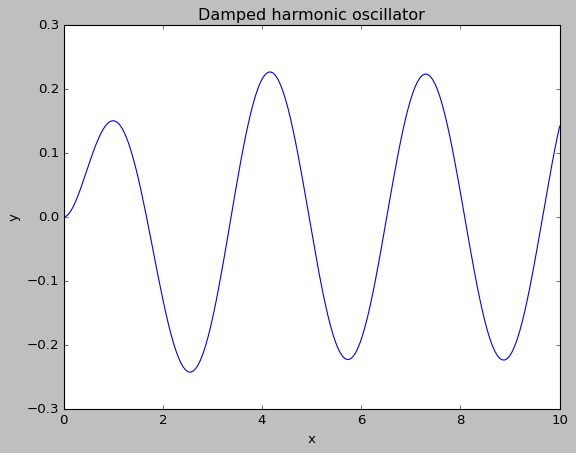

In [ ]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

## Fourier Transform

SciPy provides functions for accessing the classic FFTPACK library from NetLib, an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.
To use the fftpack module in a python program, include it using:

In [ ]:
from numpy.fft import fftfreq 
from scipy.fftpack import *

### Simple use

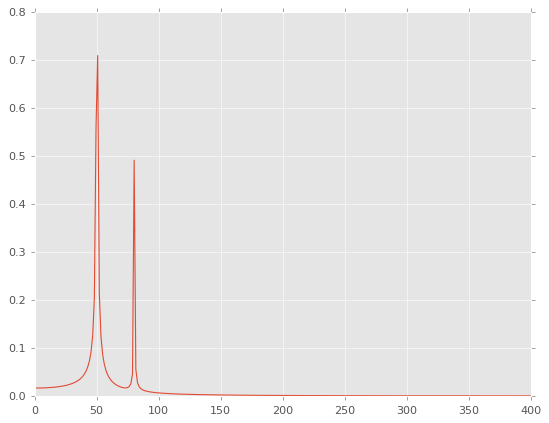

In [ ]:
N=600
T=1.0/800.0
x=np.linspace(0.0,N*T,N)
y=np.sin(50.0*2.0*np.pi*x)+0.5*np.sin(80.0*2.0*np.pi*x)
yf=fft(y)
xf=np.linspace(0.0,1.0/(2.0*T),N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]));

### Implementation of symmetric spectrum

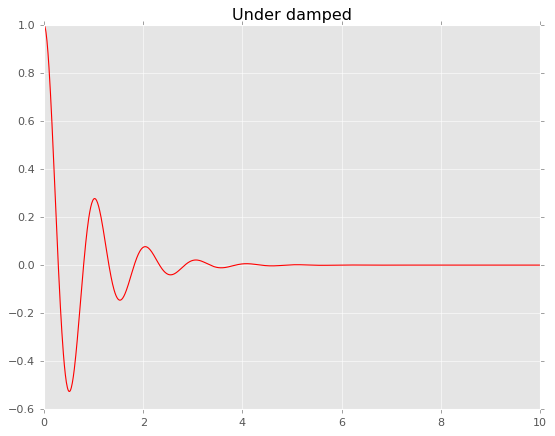

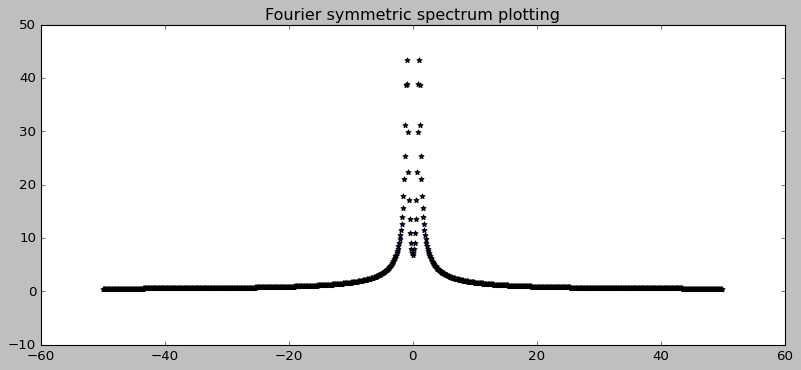

In [ ]:
def dy(y, t, zeta, w0): 
    """ The right-hand side of the damped oscillator ODE """ 
    x, p = y[0], y[1]
    dx = p 
    dp = -2 * zeta * w0 * p - w0**2 * x
    
    return [dx, dp]

def fourier(t, y2):
    
    plt.style.use('classic')
    
    N = len(t) 
    dt = t[1]-t[0]
    # calculate the fast fourier transform 
    # y2 is the solution to the under-damped oscillator 
    F = fft(y2[:,0])
    # calculate the frequencies for the components in F 
    w = fftfreq(N, dt)
    
    fig, ax = plt.subplots(figsize=(12,5)) 
    ax.scatter(w, abs(F), marker='*');
    ax.set_title('Fourier symmetric spectrum plotting')

plt.style.use('ggplot')
    
# initial state: 
y0 = [1.0, 0.0]
# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000) 
w0 = 2*np.pi*1.0

y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped 

fig, ax = plt.subplots()
ax.plot(t, y2[:,0], 'r', label="under damped");
ax.set_title('Under damped');
    
fourier(t,y2)

## Linear algebra

Linear equation systems on the matrix form 
Ax = b, 
where A is a matrix and x, b are vectors.

In [ ]:
from scipy import linalg as la

In [ ]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]]) 
b = np.array([1,2,3])

x = la.lstsq(A, b);
print(x)

(array([-0.05555556,  0.11111111,  0.27777778]), array([], dtype=float64), 2, array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))


The eigenvalue problem for a matrix A: $A_vn = λ_nv_n$ where vn is the nth eigenvector and $λ_n$ is the nth eigenvalue. To calculate eigenvalues of a matrix, use the eigvals and for calculating both eigenvalues and eigenvectors, use the function eig:


In [ ]:
def return_eig():
    A = np.random.rand(3,3)
    
    evals = eigvals(A)
    print('1')
    print('eigenvals =', evals)
    
    evals, evecs = eig(A)
    print(2)
    print('eigenvals = '+ str(evals) + ', \n' + 'eigenvectors: \n' + str(evecs))

return_eig()

1
eigenvals = [1.46080095+0.j         0.09978184+0.16925865j 0.09978184-0.16925865j]
2
eigenvals = [1.46080095+0.j         0.09978184+0.16925865j 0.09978184-0.16925865j], 
eigenvectors: 
[[ 0.48796605+0.j          0.72027319+0.j          0.72027319-0.j        ]
 [ 0.72579212+0.j          0.00147075+0.43912491j  0.00147075-0.43912491j]
 [ 0.48488652+0.j         -0.39208164-0.36694096j -0.39208164+0.36694096j]]


## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimiza- tion of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy, see: http://scipy-lectures.github.com/advanced/mathematicaloptimization/index.html.

To use the optimization module in SciPy, first include the optimize module:

In [ ]:
from scipy import optimize

### Finding a minima

First, let’s find the minima of a simple function of a single variable:

In [ ]:
def f(x):
  return 4*x**3 + (x-2)**2 + x**4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  


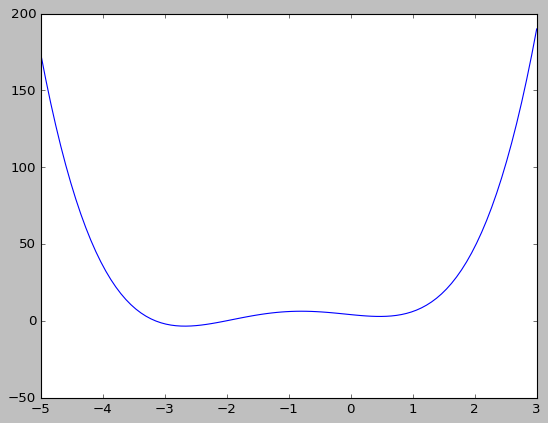

In [ ]:
fig, ax = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the fmin_bfgs function to find the minima of a function:

In [ ]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

## Interpolation


Interpolation is simple and convenient in SciPy: The interp1d function, when given arrays describing X and Y data, returns an object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X). It returns the corresponding interpolated y value:

In [ ]:
from scipy import interpolate

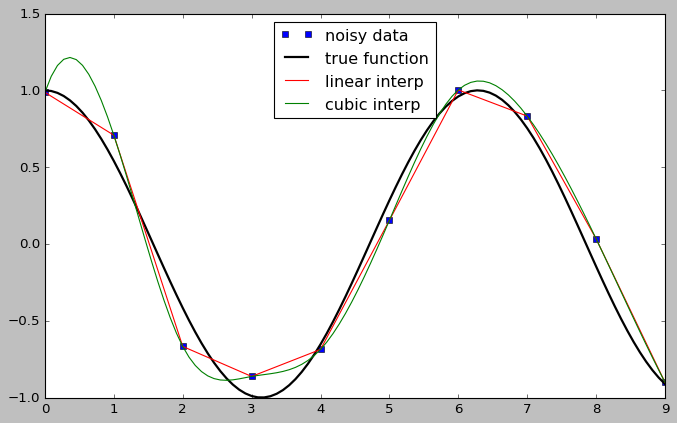

In [ ]:
def function_interpolation():
    f  = lambda x: np.cos(x)

    n = np.arange(0, 10) 
    x = np.linspace(0, 9, 100)
    y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise 
    y_real = f(x)

    linear_interpolation = interpolate.interp1d(n, y_meas)
    y_interp1 = linear_interpolation(x)

    cubic_interpolation = interpolate.interp1d(n, y_meas, kind='cubic') 
    y_interp2 = cubic_interpolation(x)

    fig, ax = plt.subplots(figsize=(10,6)) 
    ax.plot(n, y_meas, 'bs', label='noisy data') 
    ax.plot(x, y_real, 'k', lw=2, label='true function') 
    ax.plot(x, y_interp1, 'r', label='linear interp') 
    ax.plot(x, y_interp2, 'g', label='cubic interp') 
    ax.legend(loc='best');
    
function_interpolation()

## Statistics

The scipy.stats module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.
There is also a very powerful Python package for statistical modeling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [ ]:
from scipy import stats

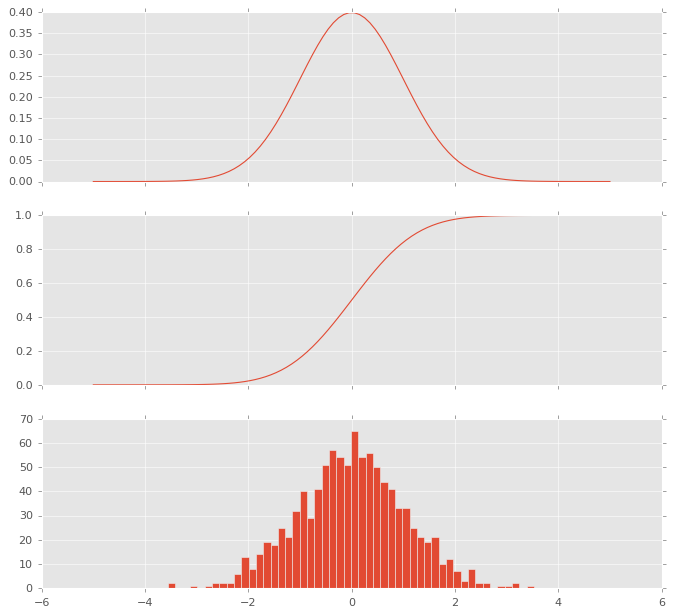

In [ ]:
plt.style.use('ggplot')

# create a (continous) random variable with normal distribution 
Y = stats.norm()

# create a linspace
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True, figsize = (10, 9))

# plot the probability distribution function (PDF) 
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF) 
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y 
axes[2].hist(Y.rvs(size=1000), bins=50);